<a href="https://colab.research.google.com/github/Afshan300/OASISINFOBYTE/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [4]:
from google.colab import files
uploaded = files.upload()


Saving archive (8).zip to archive (8).zip


In [5]:
import zipfile
import io
import os

# Automatically detect uploaded ZIP filename
zip_filename = list(uploaded.keys())[0]
print("Uploaded ZIP File:", zip_filename)

# Create folder to extract into
extract_folder = "archive8_data"
os.makedirs(extract_folder, exist_ok=True)

# Extract ZIP
with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Show extracted files
print("\nExtracted files:")
for root, dirs, files in os.walk(extract_folder):
    for f in files:
        print(os.path.join(root, f))


Uploaded ZIP File: archive (8).zip

Extracted files:
archive8_data/car data.csv


In [6]:
# Load the dataset from the extracted folder
df = pd.read_csv("archive8_data/car data.csv")

print("✅ Data Loaded Successfully!")
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())


✅ Data Loaded Successfully!

First 5 rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Column names:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


In [7]:
print("\nDataset shape (rows, columns):", df.shape)

print("\nMissing values in each column:")
print(df.isnull().sum())



Dataset shape (rows, columns): (301, 9)

Missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [8]:
if "Car_Name" in df.columns:
    df = df.drop("Car_Name", axis=1)
    print("\nDropped 'Car_Name' column.")
else:
    print("\nNo 'Car_Name' column to drop.")

print("\nColumns now:")
print(df.columns.tolist())



Dropped 'Car_Name' column.

Columns now:
['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


In [9]:
# Identify object (string) columns
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", cat_cols.tolist())

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("\nAfter Label Encoding:")
print(df.head())



Categorical columns: ['Fuel_Type', 'Selling_type', 'Transmission']

After Label Encoding:
   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0  2014           3.35           5.59       27000          2             0   
1  2013           4.75           9.54       43000          1             0   
2  2017           7.25           9.85        6900          2             0   
3  2011           2.85           4.15        5200          2             0   
4  2014           4.60           6.87       42450          1             0   

   Transmission  Owner  
0             1      0  
1             1      0  
2             1      0  
3             1      0  
4             1      0  


In [10]:
# Make sure Selling_Price exists
if "Selling_Price" not in df.columns:
    raise Exception("Column 'Selling_Price' not found! Available columns: " + str(df.columns.tolist()))

X = df.drop("Selling_Price", axis=1)   # input features
y = df["Selling_Price"]                # target

print("\nFeature columns (X):", X.columns.tolist())
print("Target column (y): Selling_Price")



Feature columns (X): ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
Target column (y): Selling_Price


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("\nTraining samples:", len(X_train))
print("Testing samples:", len(X_test))



Training samples: 240
Testing samples: 61


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\n✅ Model training completed!")
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2, ...):")
for col, coef in zip(X.columns, model.coef_):
    print(f"  {col}: {coef:.4f}")



✅ Model training completed!
Intercept (b0): -724.6008951597256
Coefficients (b1, b2, ...):
  Year: 0.3627
  Present_Price: 0.4399
  Driven_kms: -0.0000
  Fuel_Type: -1.3245
  Selling_type: -1.1697
  Transmission: -1.6375
  Owner: -0.9215


In [13]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}  (Closer to 1 = better)")



📈 Model Performance:
Mean Squared Error (MSE): 3.53
R² Score: 0.847  (Closer to 1 = better)


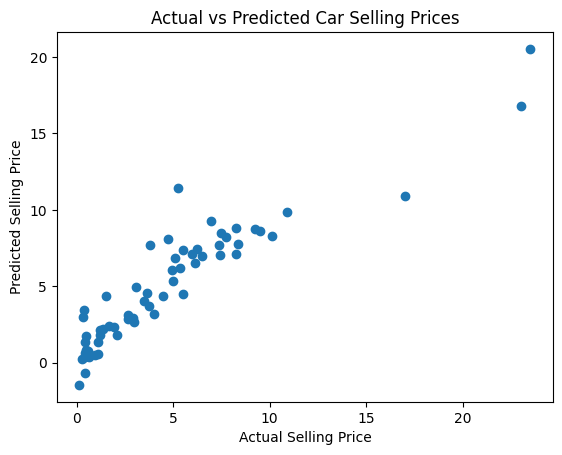

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Selling Prices")
plt.show()


In [16]:
print("\n🔮 Enter car details to predict selling price:")

input_values = []
for col in X.columns:
    val = float(input(f"Enter value for '{col}': "))
    input_values.append(val)

predicted_price = model.predict([input_values])[0]

print(f"\n💰 Predicted Selling Price: {predicted_price:.2f} (in lakhs)")



🔮 Enter car details to predict selling price:
Enter value for 'Year': 2022
Enter value for 'Present_Price': 10
Enter value for 'Driven_kms': 30000
Enter value for 'Fuel_Type': 10
Enter value for 'Selling_type': 1
Enter value for 'Transmission': 0
Enter value for 'Owner': 1

💰 Predicted Selling Price: -2.26 (in lakhs)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
